In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
import sys
sys.path.insert(0, '/'.join(sys.path[0].split('/')[:-1] + ['scripts']))

from optimizer import *

In [3]:
#export
def fit(num_epochs, data_bunch, model, loss_fn, optimizer):
    accuracies, losses = [], []
    
    for epoch in range(1, num_epochs+1):
        for x_batch, y_batch in data_bunch.train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            
            loss_fn.backward()
            model.backward()
            
            optimizer.step()
            optimizer.zero_grad()
            
        count = accuracy = loss = 0
        for x_batch, y_batch in data_bunch.valid_dl:
            pred = model(x_batch)
            accuracy += compute_accuracy(pred, y_batch)
            loss += loss_fn(pred, y_batch)
            count += 1
        accuracy /= count
        loss /= count
        
        accuracies.append(accuracy)
        losses.append(loss)
        print(f'Epoch {epoch}  Accuracy {round(accuracy.item(), 3)}  Loss {round(loss.item(), 3)}')
    
    return accuracies, losses

In [4]:
data_bunch = get_data_bunch(*get_mnist_data(), batch_size=64)
model = get_lin_model(data_bunch)
optimizer = Optimizer(list(model.parameters()), learning_rate=0.1)
loss_fn = CrossEntropy()

In [5]:
accuracies, losses = fit(10, data_bunch, model, loss_fn, optimizer)

Epoch 1  Accuracy 0.956  Loss 0.16
Epoch 2  Accuracy 0.963  Loss 0.123
Epoch 3  Accuracy 0.968  Loss 0.11
Epoch 4  Accuracy 0.968  Loss 0.115
Epoch 5  Accuracy 0.965  Loss 0.12
Epoch 6  Accuracy 0.969  Loss 0.108
Epoch 7  Accuracy 0.959  Loss 0.149
Epoch 8  Accuracy 0.968  Loss 0.108
Epoch 9  Accuracy 0.971  Loss 0.11
Epoch 10  Accuracy 0.973  Loss 0.104


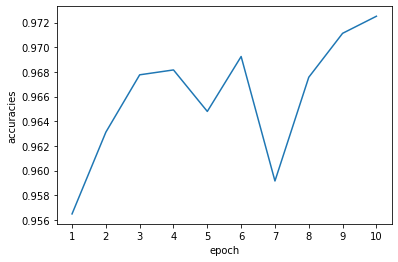

In [6]:
plot(accuracies, 'accuracies')

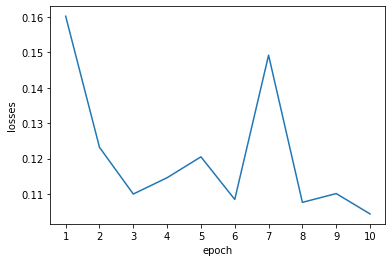

In [7]:
plot(losses, 'losses')